In [5]:
import pipeline
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

## Reading data

In [9]:
filepath = '../data/covid_df.pkl'
df = pd.read_pickle(filepath)
df['log_cases'] = np.log(df['Confirmed Cases'] + 1)

## Training MLP classifier (takes about 3 hours to train)

In [10]:
n_weeks_prediction = 2
df_train, df_test = pipeline.split_and_scale_on_last_weeks(df, n_weeks_prediction)
pipeline.sanity_check(df_train, df_test)
X_train, y_train = pipeline.divide_target_and_features(df_train, 'Confirmed Cases')
X_test, y_test = pipeline.divide_target_and_features(df_test, 'Confirmed Cases')

Success: Features match
Success: No NAs remain


In [ ]:
mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train, y_train)

## Saving classifier in a pickle

In [28]:
import pickle
pickle.dump(mlp, open("../trained_classifiers/mlp_cases.pkl", 'wb'))

0.05917159763313609


## Loading model from pickle to avoid training again

In [3]:
mlp_cases = pickle.load(open("../trained_classifiers/mlp_cases.pkl", 'rb'))

## Calculating metrics

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = mlp_cases.predict(X_test)

In [15]:
print("R2 score is: " + str(r2_score(y_test, y_pred)))
print("MSE is: " + str(mean_squared_error(y_test, y_pred)))

R2 score is: 0.9714869154724224
MSE is: 831433855.0131493


## Predicting with model

In [31]:
predictions = pipeline.predictions_every_country(X_test.columns[19:169], X_test, y_pred, y_test)

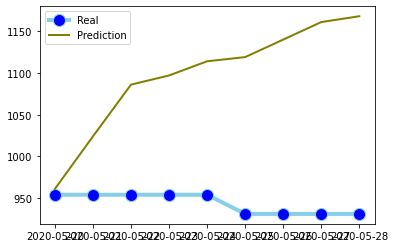

In [32]:
pipeline.plot_real_vs_prediction(X_test, y_pred, y_test, 'Lebanon')

## We save the predictions dataframe in a pickle to be used for plots later

In [44]:
predictions.to_pickle("../predictions/cases_mlp.pkl")

## We do the same with number of deaths considering quality of data is likely better

In [ ]:
X_train, y_train = pipeline.divide_target_and_features(df_train, 'Deaths')
X_test, y_test = pipeline.divide_target_and_features(df_test, 'Deaths')
mlp_deaths = MLPClassifier()

mlp_deaths.fit(X_train, y_train)
y_pred_deaths = mlp_deaths.predict(X_test)

print("R2 score is: " + str(r2_score(y_test, y_pred_deaths)))
print("MSE is: " + str(mean_squared_error(y_test, y_pred_deaths)))

## Saving pickles

In [ ]:
predictions = pipeline.predictions_every_country(X_test.columns[19:169], X_test, y_pred, y_test)
pickle.dump(mlp_deaths, open("../trained_classifiers/mlp_deaths.pkl", 'wb'))
predictions.to_pickle("../predictions/cases_mlp.pkl")